In [7]:
%matplotlib inline
%load_ext autoreload
# ! pip install git+https://github.com/avivajpeyi/pspline_psd.git -q

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example: AR process

First, lets generate some data from an AR process and plot it.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft
from slipper.example_datasets.ar_data import generate_ar_timeseries, plot_ar_spectrogram_psd
from slipper.sample.spline_model_sampler import fit_data_with_pspline_model
from slipper.plotting import set_plotting_style
from slipper.fourier_methods import get_periodogram
from slipper.plotting.plot_spline_model_and_data import plot_spline_model_and_data

np.random.seed(42)
set_plotting_style()
N_TOTAL_MCMC_STEPS = 500

## Example 1: AR(3)

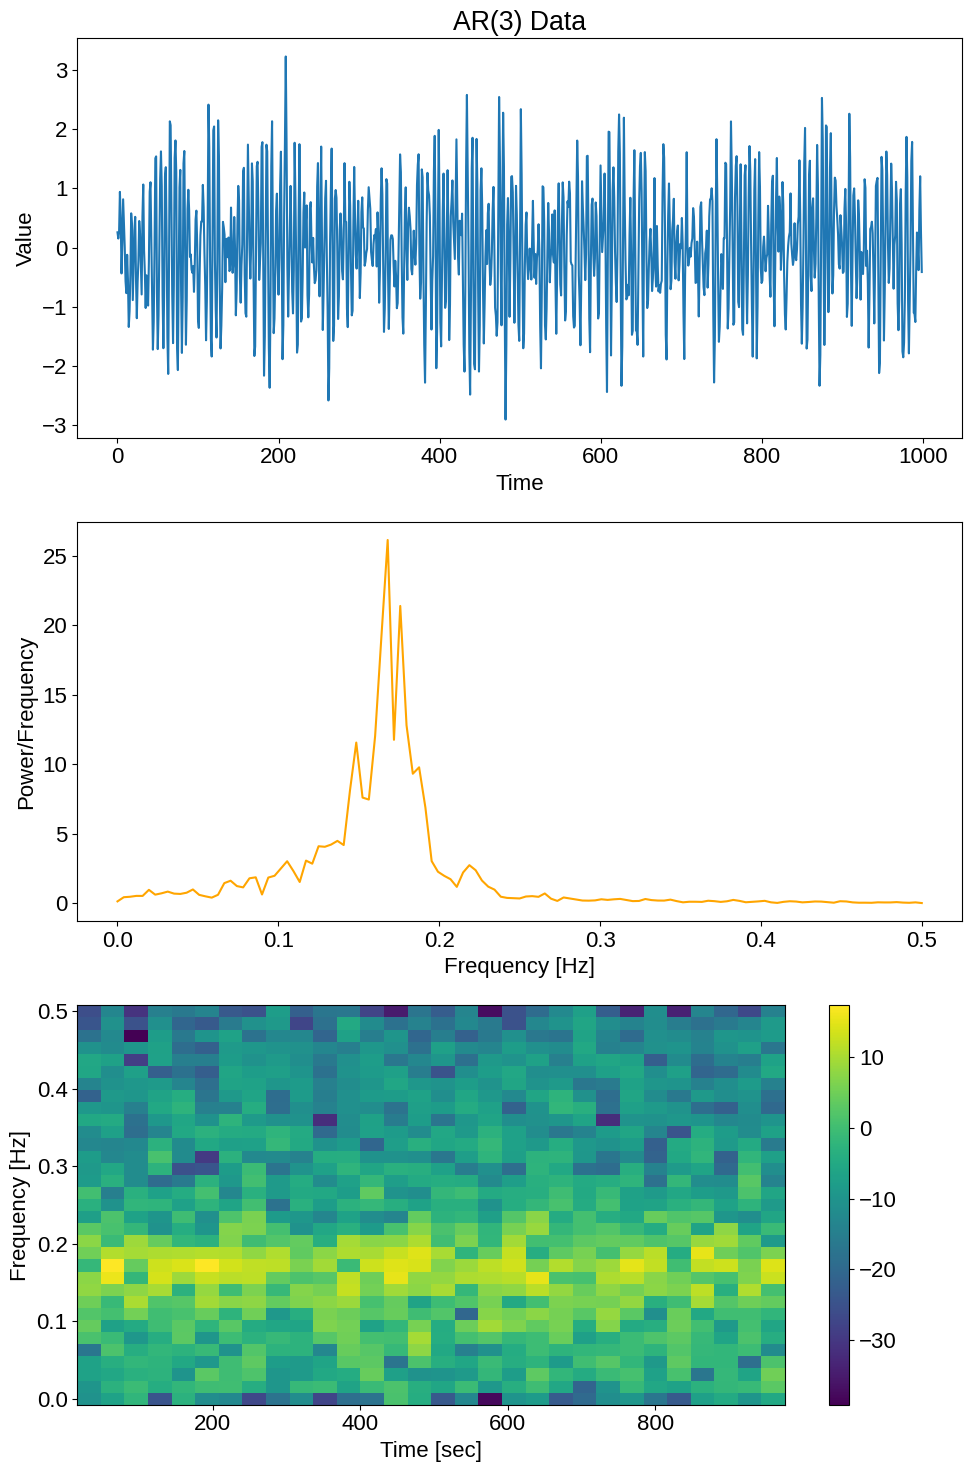

In [9]:
data = generate_ar_timeseries(order=3, n_samples=1000)
fig = plot_ar_spectrogram_psd(data, title='AR(3) Data')


In [13]:
pdgrm = get_periodogram(timeseries=data)
mcmc = fit_data_with_pspline_model(
    data=pdgrm, Ntotal=N_TOTAL_MCMC_STEPS, degree=3, 
    eqSpaced=True, n_checkpoint_plts=10
)
fig = mcmc.make_summary_plot()

|Slipper|21/08 18:21:03|WARNING| Checkpoint plotting is enabled. This will slow down the sampling process.
|Slipper|21/08 18:21:03|INFO| Running sampler with the following arguments:
Sampler arguments:
{'Ntotal': 500,
 'burnin': 166,
 'n_checkpoint_plts': 10,
 'thin': 1,
 'δα': 0.0001,
 'δβ': 0.0001,
 'τα': 0.001,
 'τβ': 0.001,
 'φα': 1,
 'φβ': 1}
Spline arguments:
{'degree': 3, 'diffMatrixOrder': 2, 'eqSpaced': True, 'k': 30}



MCMC sampling:   0%|          | 0/499 [00:00<?, ?it/s]

|Slipper|21/08 18:21:03|INFO| <<Plotting checkpoint>>
|Slipper|21/08 18:21:04|INFO| <<Plotting checkpoint>>
|Slipper|21/08 18:21:04|INFO| <<Plotting checkpoint>>
|Slipper|21/08 18:21:05|INFO| <<Plotting checkpoint>>
|Slipper|21/08 18:21:06|INFO| <<Plotting checkpoint>>
|Slipper|21/08 18:21:06|INFO| <<Plotting checkpoint>>
|Slipper|21/08 18:21:07|INFO| <<Plotting checkpoint>>
|Slipper|21/08 18:21:08|INFO| <<Plotting checkpoint>>
|Slipper|21/08 18:21:09|INFO| <<Plotting checkpoint>>
|Slipper|21/08 18:21:11|INFO| <<Creating gif>>


FileNotFoundError: The gifsicle library was not found on your system.
On MacOS it is automatically installed using brew when you use the pip install command.
On other systems, like Linux systems and Windows, it prompts the instructions to be followed for completing the installation.
You can learn more on how to install gifsicle on the gifsicle and pygifsicle documentation.

## Example 2: AR(4)

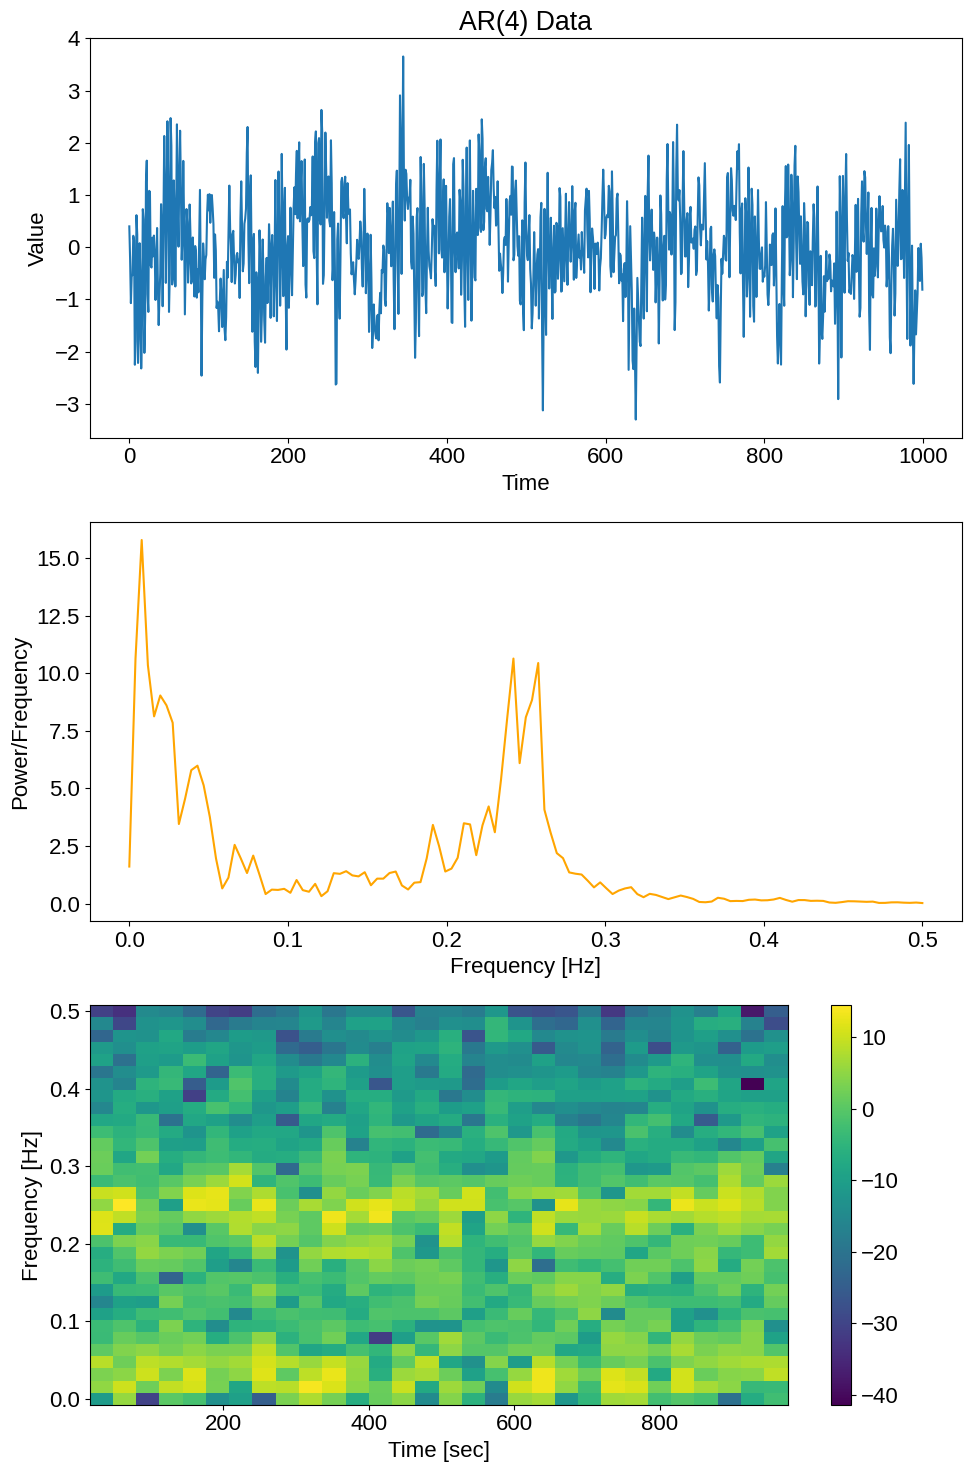

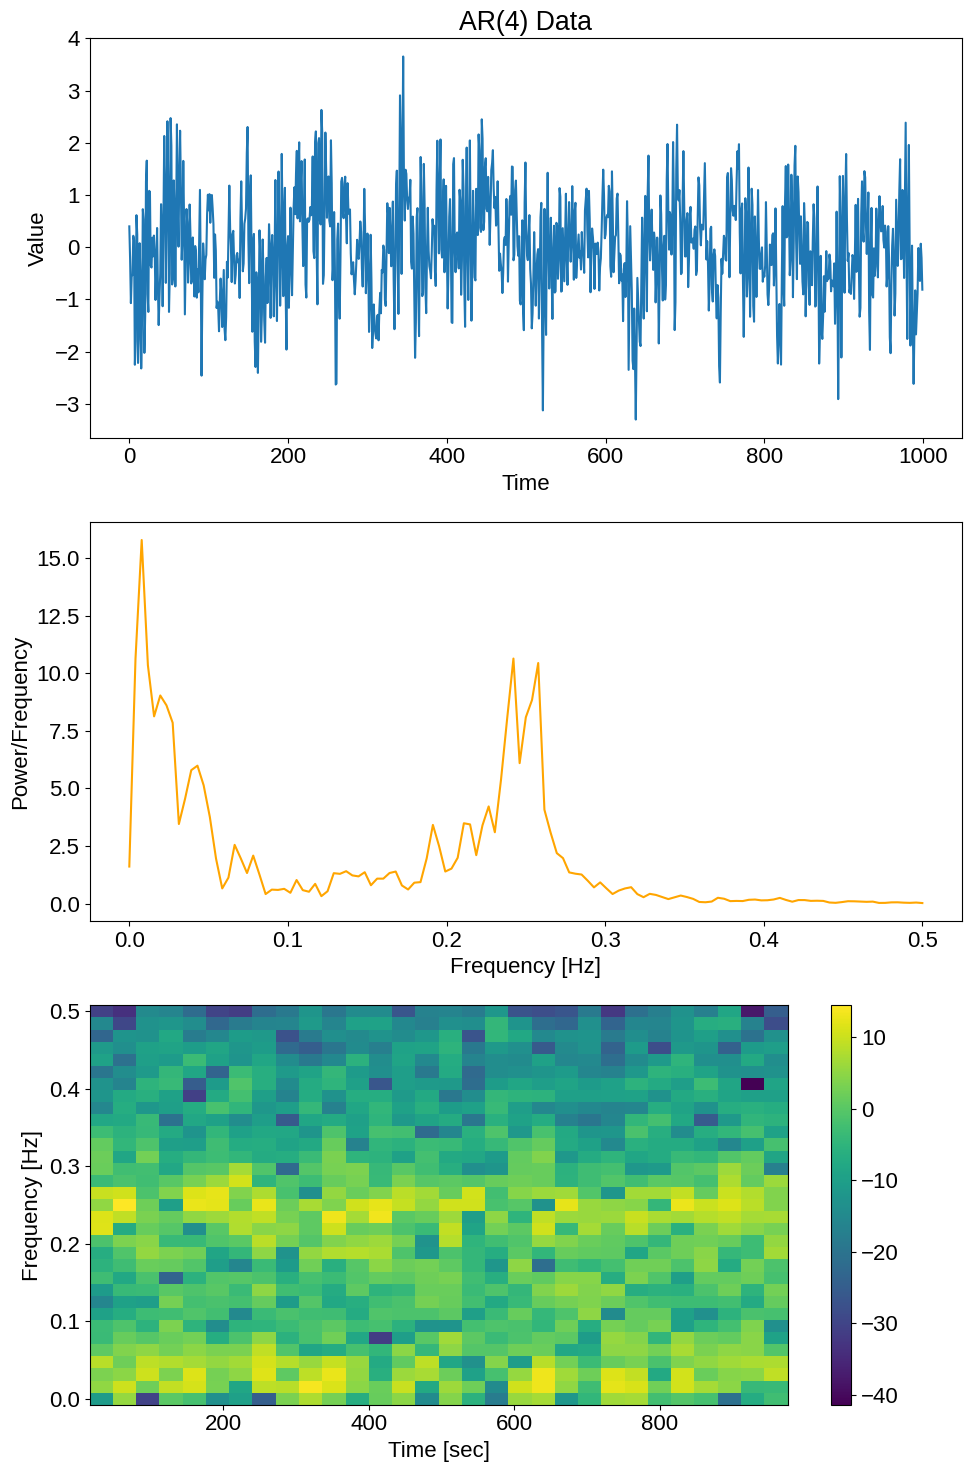

In [11]:
data = generate_ar_timeseries(order=4, n_samples=1000)
fig = plot_ar_spectrogram_psd(data, title='AR(4) Data');
fig

## Equally spaced knots

In [12]:
pdgrm = get_periodogram(timeseries=data)
mcmc = fit_data_with_pspline_model(
    data=pdgrm, Ntotal=N_TOTAL_MCMC_STEPS, degree=3, 
    eqSpaced=True, compute_psds=True
)

TypeError: fit_data_with_pspline_model() got an unexpected keyword argument 'compute_psds'

In [ ]:
fig = mcmc.make_summary_plot()

In [ ]:
fig = plot_spline_model_and_data(pdgrm, mcmc.psd_quantiles, separarte_y_axis=True)

## Non-equally spaced knots

In [ ]:
pdgrm = get_periodogram(timeseries=data)
mcmc = fit_data_with_pspline_model(
    data=pdgrm, Ntotal=N_TOTAL_MCMC_STEPS, degree=3, 
    eqSpaced=False, compute_psds=True
)

In [ ]:
fig = mcmc.make_summary_plot()

In [ ]:
mcmc_quant = mcmc.get_model_quantiles()
plt_pdgrm = pdgrm[1:-1]
N = len(plt_pdgrm)
x = np.linspace(0,1,N)
fig = plot_spline_model_and_data(plt_pdgrm, mcmc_quant, separarte_y_axis=False, x=x)
for a_ in fig.get_axes():
    a_.set_yscale('log')
    a_.relim()
    